### 1 Elección de conjunto de datos

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

file_path = './shopping_trends.csv'

data = pd.read_csv(file_path)

data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


### 2. Limpieza y Transformación de los Datos

In [7]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [8]:
missing_values = data.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

Valores faltantes por columna:
 Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [9]:
columns_to_drop = ['Promo Code Used']
data = data.drop(columns=columns_to_drop, axis=1)

In [10]:
data['Review Rating'] = data['Review Rating'].fillna(data['Review Rating'].mean())

In [11]:
data['Age'] = data['Age'].astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

### 3 EDA

In [13]:
data.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Previous Purchases,Preferred Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,6,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Credit Card,Free Shipping,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,696,675,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


Distribución de edad

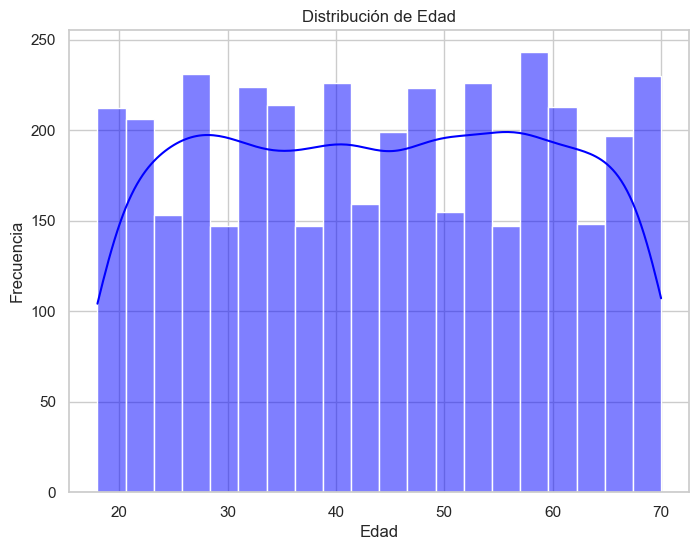

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


### 4 VISUALIZACIÓN DE DATOS

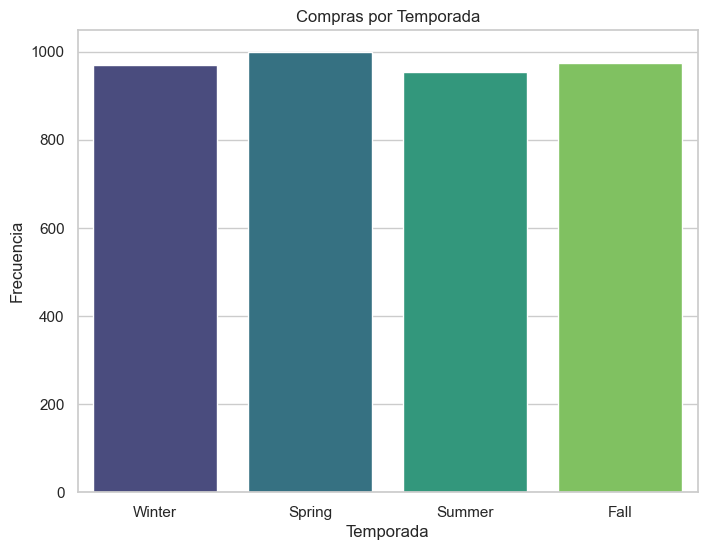

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Season', data=data, palette='viridis', hue='Season')  # Agregamos hue='Season'
plt.title("Compras por Temporada")
plt.xlabel("Temporada")
plt.ylabel("Frecuencia")
plt.legend([], [], frameon=False)
plt.show()

Gasto promedio por categoría

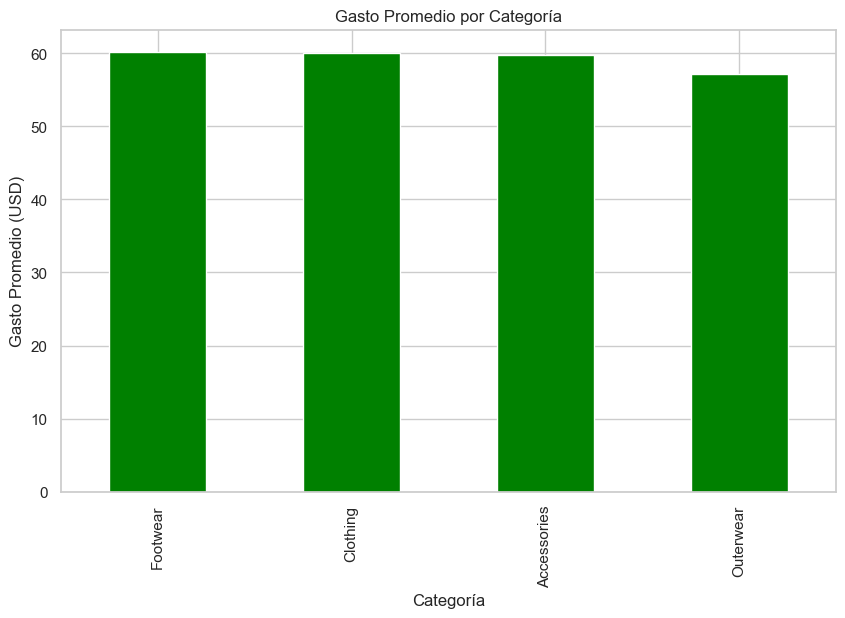

In [25]:
category_avg_spend = data.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
category_avg_spend.plot(kind='bar', figsize=(10, 6), color='green')
plt.title("Gasto Promedio por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Gasto Promedio (USD)")
plt.show()

Análisis de frecuencia de compras

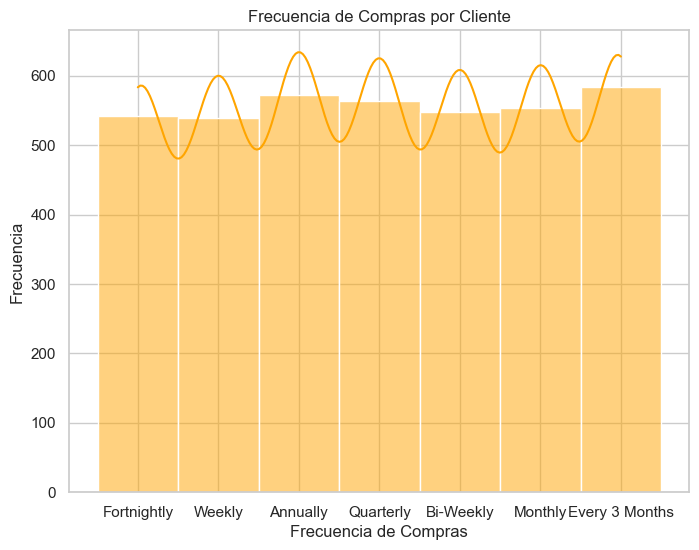

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Frequency of Purchases'], kde=True, bins=15, color='orange')
plt.title("Frecuencia de Compras por Cliente")
plt.xlabel("Frecuencia de Compras")
plt.ylabel("Frecuencia")
plt.show()


Relación entre edad y gasto

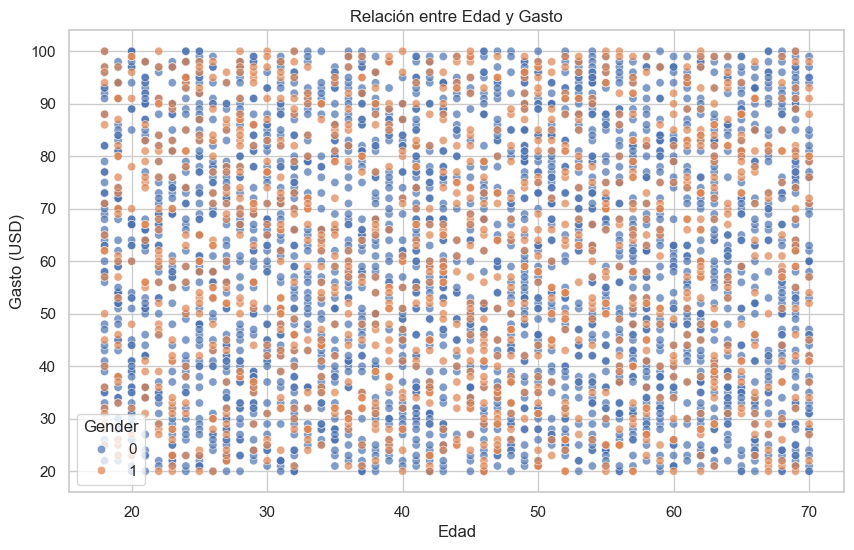

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Gender', data=data, alpha=0.7)
plt.title("Relación entre Edad y Gasto")
plt.xlabel("Edad")
plt.ylabel("Gasto (USD)")
plt.show()

## Hallazgos y Observaciones Clave

1. **Segmentación Demográfica**:
   - Los clientes están distribuidos en un rango de edad amplio (18 a 70 años), con una edad promedio de 44 años.
   - Los datos de género están equilibrados, facilitando análisis de tendencias por sexo.

2. **Patrones de Compra**:
   - El gasto promedio por transacción es de aproximadamente **59.76 USD**, con un rango de 20 a 100 USD.
   - Los clientes con más compras previas tienden a realizar compras de mayor valor, indicando una posible lealtad o familiaridad con la marca.

3. **Categorías de Productos**:
   - Existen **4 categorías principales** de productos, con una diversidad de colores y tamaños que permite un análisis detallado de preferencias.

4. **Estacionalidad**:
   - Los datos incluyen información estacional, permitiendo identificar patrones en las compras durante diferentes estaciones del año.
  
## Conclusiones y Próximos Pasos

### Conclusiones
- El dataset muestra una fuerte correlación entre el número de compras previas y el gasto total, lo cual puede utilizarse para desarrollar estrategias de fidelización.
- Los métodos de pago más utilizados y las categorías más populares son puntos clave para personalizar campañas de marketing.
- Las compras estacionales y los tamaños preferidos permiten ajustar los inventarios según las tendencias del cliente.

### Próximos Pasos
1. Crear un modelo predictivo para anticipar el comportamiento de compra basado en las características del cliente.
2. Implementar estrategias de segmentación de clientes para ofrecer promociones personalizadas.
3. Realizar un análisis más detallado de las categorías menos populares para entender su desempeño.
